## Importing necessary librabries and loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Loading 'application_data' 
df_app = pd.read_csv("application_data.csv")
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Checking the structure of the data

In [3]:
df_app.shape

(307511, 122)

In [4]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
# The column 'CNT_FAM_MEMBERS', which indicates number of family member of a client, cannot be of float data type, as number of family member cannot be decimal.
# Therefore, we need to change the datatype from float to integer
df_app.CNT_FAM_MEMBERS = df_app.CNT_FAM_MEMBERS.astype('int', errors = 'ignore')

In [6]:
df_app.CNT_FAM_MEMBERS.dtype

dtype('float64')

In [7]:
# The column 'DAYS_REGISTRATION' indicates the number of days before the application did the client changed his registration.
# As this variable represents number of days it can also not be in decimal or float, therefore, it has to be changed into integer.
df_app.DAYS_REGISTRATION = df_app.DAYS_REGISTRATION.astype('int')

In [8]:
df_app.DAYS_REGISTRATION.dtype

dtype('int32')

In [9]:
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

As we can see from the info of the dataframe there are 106 numerical variables, though this includes the flag varibles which have 1 as 'Yes' and 0 as 'No'. There are 16 object data type variable, though among them there are 2 flag variables having values 'Y' as yes and 'N' as no. Among the numerical variables there are discrete and continuous type variables. For example, CNT_FAM_MEMBERS, CNT_CHILDREN etc. are discrete variables, whereas, AMT_INCOME_TOTAL,AMT_CREDIT etc. are continuous variables.


In [10]:
# Now we look at the statistical description of the columns
df_app.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


## Data quality check and Missing value

From the description of the columns first thing we notice that the count of all variables are not equal, therefore, there must be some missing value present.

In [11]:
# Checking for the missing values
df_app.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
# Calculating the percentage of missing value
(df_app.isnull().sum()/ len(df_app))*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [13]:
# Dropping the columns with more than 50% missing values
cols = df_app.columns[df_app.isnull().mean()>0.5]
df_app.drop(cols, axis=1, inplace=True)

In [14]:
df_app.shape

(307511, 81)

In [15]:
# Imputing the columns having less than 15% missing values
cols2 =list(df_app.columns[df_app.isnull().mean()<0.15])
cols2 =list(df_app.columns[df_app.isnull().mean()>0.0])
cols2

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [16]:
len(cols2)

26

Among the 26 columns with missing values less than 15% but greater than 0%, we do not need to impute all the columns, as many of these columns are irrelevent in the context of credit risk associated with the loan applicants.

In [17]:
# Imputing the columns 'AMT_ANNUITY'
# Checking the number of null values
df_app.AMT_ANNUITY.isnull().sum()

12

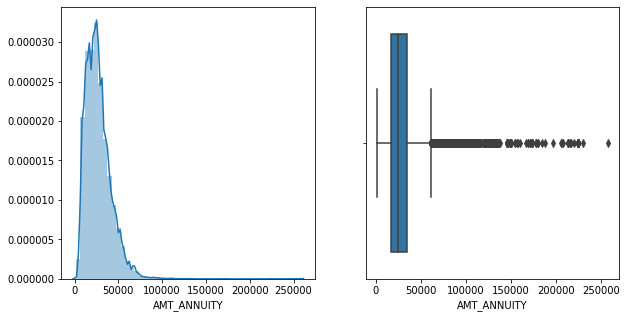

In [18]:
# As we can see it has very less number of null values. To impute the null values first we have to look at its distribution.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_app['AMT_ANNUITY'])

plt.subplot(1,2,2)
sns.boxplot(df_app['AMT_ANNUITY'])
plt.show()

Looking at both the plots, the distribution plot and the boxplot we can see that, there is a significant presence of outliers on the high value end, i.e., this variable has a long positive tail. If we impute this column with mean, it can lead to overestimation as mean gets affected by outliers. But median on the other hand refers to the middle value of a distribution and does not get affected by outliers. Hence, imputing the 12 blank values with median of the series will not distort the overall picture.

##### Outliers
The very basic way of detecting outliers is by the means of inter-quartile range (IQR). A datapoint is treated as outlier if the data point is lying outside IQR. Mathematically, any datapoint, x will be an outlier if, x > Q3+1.5*IQR or x < Q1-1.5*IQR
These two extreme points are represented by the upper and lower whiskers of a box plot.
Observing the boxplot of the 'AMT_ANNUITY' variable, we can observe that the upper whisker is somewhere between 50k and 1 million, more closer to 50k. After that there is a almost continuous values till a little before 1.5 million.
To get a better understanding of how the values are distributed above 75th percentile or third quartile, we need to find the values of 80th, 85th, 90th and 95th percentile.


In [19]:
#Looking at the percentiles above 75
df_app.AMT_ANNUITY.quantile([.75, .80, .85, .90, .95, .99])

0.75    34596.0
0.80    37516.5
0.85    40806.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

As we can see that, 95% of the data comes under the value of almost 53.5k, the difference between 95th and 99th percentile is almost 17k, whereas the difference between 90 and 95th percentile is around 8k. The difference between the previous quartiles are even less. Therefore we can infer that, after 95th percentile the data points occur more and more less regularly, i.e. the data points become more and more unlikely to occur. Therefore, we can cap the data points at 53k, which is in line with what the boxplot indicates.

In [20]:
# The 'AMT_GOODS_PRICE' is also a continuous numerical variable like 'AMT_ANNUITY', therefore, the approach of imputation will also be similar.
# Checking the number of null values
df_app.AMT_GOODS_PRICE.isnull().sum()

278

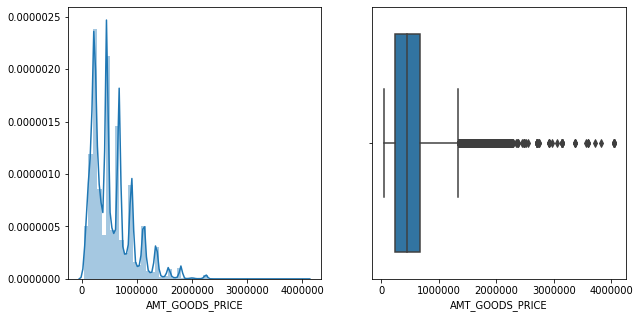

In [21]:
# Distribution of the variable 'AMT_GOODS_PRICE'
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_app['AMT_GOODS_PRICE'])

plt.subplot(1,2,2)
sns.boxplot(df_app['AMT_GOODS_PRICE'])
plt.show()

Similar to the 'AMT_ANNUITY' variable, 'AMT_GOODS_PRICE' also has outliers on the high value side. The distribution of thevalues is not quite smooth like the 'AMT_ANNUITY', but overall frequency falls sharply a little before the amount 1 million and it keeps on falling for higher values. Due to presence of positive high value outliers using mean to impute the missing values would not be appropriate as it may lead to overestimation. Median value does not get affected by outliers and therefore using median for imputation will be appropriate.

##### Outliers
As the boxplot shows the upper whisker lies between 1 million and 2 million. To get a better lok at the distribution of datapoints above 75th percentile we will calculate values of 80th, 90th and 99th percentile.

In [22]:
#Looking at the percentiles above 75
df_app.AMT_GOODS_PRICE.quantile([.75, .80, .85, .90, .95, .99])

0.75     679500.0
0.80     814500.0
0.85     900000.0
0.90    1093500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

From the distribution of the data points above 75th percentile we can see that, after 95th percentile the values become more irregular and the 99% of the values are less than 1.8 million. Therefore, we can cap the values for this variable at 1.4 million, which is again in line with what the boxplot is displaying.

In [23]:
# The 'NAME_TYPE_SUITE' variable is a categorical variable. First, lets see what categories it contains
df_app['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

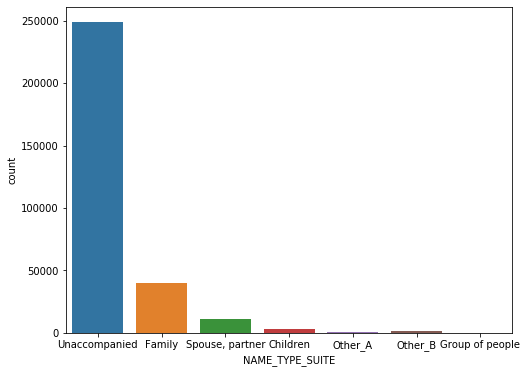

In [24]:
# Plotting a countplot to visualize the distribution
plt.figure(figsize=(8,6))
sns.countplot(x='NAME_TYPE_SUITE',data=df_app);

In [25]:
# Checking number of null values present
df_app.NAME_TYPE_SUITE.isnull().sum()

1292

The 'NAME_TYPE_SUITE' variable represents the client was accompanied by whom at the time of applying for the loan. As we can see there are 7 categories and most of the client were unaccompanied (almost 81%). 
There are a number of ways to treat missing values for categorical variables, mode can be used, we can drop the rows with missing values, it can be left as a separate category etc. Here, as we can see more than 80% clients fall under unaccompanied category and the percentage of missing value is really low (0.4% almost), imputation using mode will not change the distribution of the data so much. Dropping the rows will lead to unnecessary loss of values.

In [26]:
# The 'OCCUPATION_TYPE' variable is also a categorical variable like 'NAME_TYPE_SUITE'. 
# Checking for the unique categories 
df_app['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

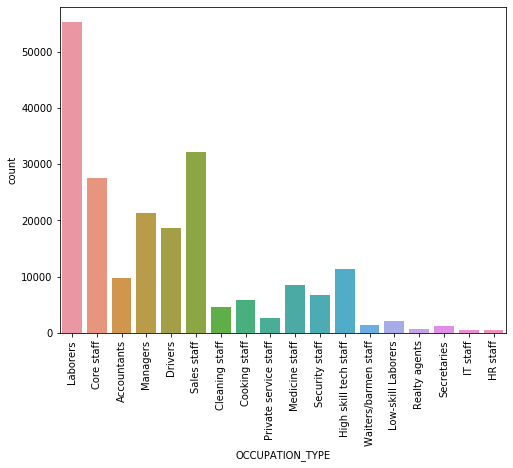

In [27]:
# Plotting a countplot to visualize the distribution
plt.figure(figsize=(8,6))
occu_bar = sns.countplot(x='OCCUPATION_TYPE',data=df_app);
for item in occu_bar.get_xticklabels():
    item.set_rotation(90)

As we can see from the barplot, the highest number of clients belong to the Laborers category, though it is not the majority (almost 26%). The other significant categories such as, Sales Stuff, Core Stuff, Managers etc. are not very less, rather quite close in numbers. 

In [28]:
# Checking number of null values present
df_app.OCCUPATION_TYPE.isnull().sum()

96391

The number of missing values is higher than count of any existing category. Hence using mode like the 'NAME_TYPE_SUITE' variable would not be appropriate. The best course of action in this case would be to leave the missing values as it is, as a separate category. 

##### Outliers for categorical variables
In case of categorical varible, outlier detection or anomaly detection cannot be done on the base of mode or IQR, as if a category has very high or very low value it conveys some information about a particular type of behaviour or other attributes(economic, educational etc.). hence, we are not doing outlier in case of categorical variables.

In [29]:
# The 'CNT_FAM_MEMBERS' represents the number of family member of a client at the time of application. 
# This a discrete numeric variable. Lets find out the unique values
df_app['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

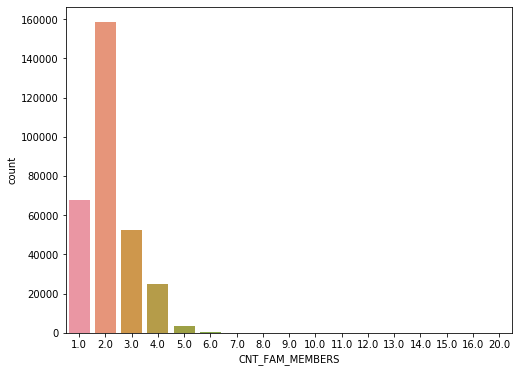

In [30]:
#Plotting a barplot to visualize the distribution
plt.figure(figsize=(8,6))
sns.countplot(x='CNT_FAM_MEMBERS',data=df_app);

From the above plot we can see that most of the clients has two members in the family, followed by single clients and three members. Clients having more than 6 members in family is almost non existent. 

In [31]:
# Checking number of null values present
df_app.CNT_FAM_MEMBERS.isnull().sum()

2

As there is only two missing values, it is almost insignificant. Here if we impute it by mode or drop the rows with missing values, it would not make any difference in the distribution of the values. But, using mode value, i.e. 2, to impute the two missing values is preferable as dropping them will be unnecessary loss of data.

##### Outliers
As we can observe from the countplot, values above 6 are almost non existent. To get a deeper look at the distribution lets calculate percentiles above 75th.

In [32]:
df_app.CNT_FAM_MEMBERS.quantile([.75, .80, .85, .90, .95, .99])

0.75    3.0
0.80    3.0
0.85    3.0
0.90    3.0
0.95    4.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64

As we can see, 90% of the values are 3 or below 3 and 95% values are equal to 4 or below 4. Therefore, we can cap the values at 4 for CNT_FAM_MEMBERS variable.

#### Removing irrelevent columns

Among the remainging 81 columns, all of it are not relevant for analyzing credit risk associated with clients. Therefore, now we have to drop the columns which are irrelevent.


In [33]:
# Remaining columns
cols_full = list(df_app.columns)
cols_full

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE'

In [34]:
# Dropping the irrelevant columns
df_app = df_app.filter(['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'REGION_POPULATION_RELATIVE'])

In [35]:
df_app.shape

(307511, 22)

## Detection and Treatment of Outliers

In the previous section, imputation of missing values, we have seen presence of outliers. Now we will dig into deeper to identify outliers in the numerical and categorical variables

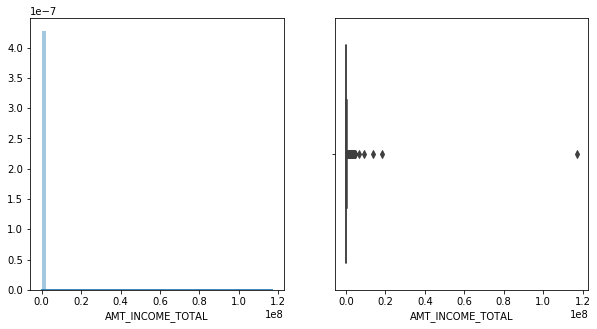

In [36]:
# Checking for outliers in another continuous numerical variable 'AMT_INCOME_TOTAL' which indicates income of the loan applicant
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_app['AMT_INCOME_TOTAL'])

plt.subplot(1,2,2)
sns.boxplot(df_app['AMT_INCOME_TOTAL'])
plt.show()

As we can see from this visualization nothing can be understood. Therefore, we need to look at the percentile wise distribution

In [37]:
#Looking at the percentiles above 50
df_app.AMT_INCOME_TOTAL.quantile([.50, .55, .60, .65, .70, .75, .80, .85, .90, .95, .99, 1])

0.50       147150.0
0.55       157500.0
0.60       162000.0
0.65       180000.0
0.70       180000.0
0.75       202500.0
0.80       225000.0
0.85       234000.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

From the above distribution first thing we notice that, there is a huge gap between 99th and 100 percentile. Secondly, the gap between the values of each percentile were low till 85th percentile and after that the gap started to increase continuously. But still the value of 95th percentile is not that outrageous. The difference between the values of 95th and 99th percentile is more than 100k. Therefore, we can cap the value of total income at 95th percentile.

In [38]:
# Next lets look at another discrete numeric variable, 'CNT_CHILDREN' i.e. count of children
# First lets look at the unique of the variable
df_app['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

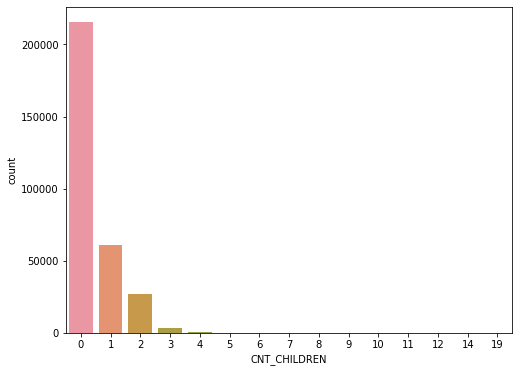

In [39]:
#Plotting a barplot to visualize the distribution
plt.figure(figsize=(8,6))
sns.countplot(x='CNT_CHILDREN',data=df_app);

In [40]:
#Looking at the percentiles above 75
df_app.CNT_CHILDREN.quantile([.75, .80, .85, .90, .95, .99])

0.75    1.0
0.80    1.0
0.85    1.0
0.90    2.0
0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

As we can see from the countplot and the percentile distribution, 99% of the values are 3 or below 3 and 95% values are equal to 2 or below 2. Therefore, we can cap the values at 3 for CNT_CHILDREN variable.

## Binning Continuous Variables

In [41]:
df_app['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [42]:
#Creating binned var
df_app.loc[:,'INCOME_RANGE']=pd.qcut(df_app.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.20,0.50,0.90,1],
labels=['Low','Medium','High','Very_high'])

In [43]:
#Checking Binned Variable
df_app['INCOME_RANGE'].value_counts()

High         126590
Medium        90089
Low           63671
Very_high     27161
Name: INCOME_RANGE, dtype: int64

### Deriving Age in years
As the 'DAYS_BIRTH' column indicates the clients age in days at the time of application and the values in the column are negative. These values are difficult to interpret and use in analysis. Therefore, dividing these values by -365 can give us the age of the clients in years and also removes the negative sign.

In [44]:
df_app['AGE'] =df_app['DAYS_BIRTH']//-365
df_app.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [45]:
#Checking the Age variable
df_app.AGE.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [46]:
#Creating binned variable for AGE
df_app['AGE_GROUP']= pd.cut(df_app.AGE,bins=np.linspace(20 ,70,num=11))

In [47]:
#Checking binned variable
df_app.AGE_GROUP.value_counts()

(35.0, 40.0]    43680
(40.0, 45.0]    39997
(30.0, 35.0]    39437
(25.0, 30.0]    36488
(50.0, 55.0]    35097
(45.0, 50.0]    34404
(55.0, 60.0]    32722
(60.0, 65.0]    24359
(20.0, 25.0]    16317
(65.0, 70.0]     5009
Name: AGE_GROUP, dtype: int64

Now looking at the 'DAYS_EMPLOYED' column we can see that it is also given as days and in negative values. First lets convert it into positive values

In [48]:
df_app['DAYS_EMPLOYED'] = df_app.DAYS_EMPLOYED.apply(lambda x: abs(x))

In [49]:
df_app['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

From the statistical description we observe the highest value of the column as almost 36.5k (100 years) which is nearly impossible. It might be some recording error. For outliers we need to look at the boxplot.

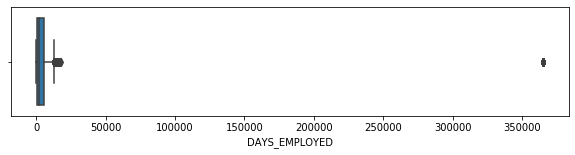

In [50]:
plt.figure(figsize=(10,2))
sns.boxplot(df_app.DAYS_EMPLOYED)
plt.show()

As it can be observed the highest value, i.e., the almost 100 years one is distorting the whole distribution. Therefore, it definitely should be removed. For the rest of the distribution we again need to look at the percentile distribution.

In [51]:
#Looking at the percentiles above 75
df_app.DAYS_EMPLOYED.quantile([.75, .80, .85, .90, .95, .99])

0.75      5707.0
0.80      9188.0
0.85    365243.0
0.90    365243.0
0.95    365243.0
0.99    365243.0
Name: DAYS_EMPLOYED, dtype: float64

Therefore, the data should be capped at 75th percentile as from 80th percentile it is the wrongly recorded value of 100 years.

## Checking for imbalance

The 'TARGET' variable of the dataset indicates which of the clients have defaulted on a payment (indicated by 1) and which of the clients have not (indicated by 0). Perfect balance refers to the situation when both kind of client will be 50% and 50%, i.e. the ratio will be 1:1. Let us check what is the scenario here.

In [52]:
df_app['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

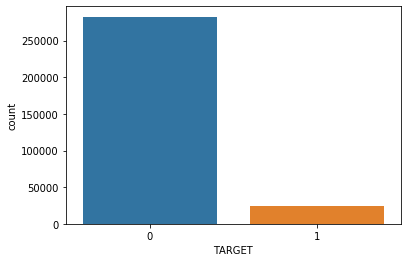

In [53]:
# plotting the count of the 0 and 1
sns.countplot("TARGET",data = df_app);

Here we observe an imbalance, the non-defaulter clients are significantly higher than defaulter clients. This is a case of positive imbalance, as the company can profit more from the non defaulting clients than the loss occuring from payment defaults.

### Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [54]:
non_default = df_app.loc[df_app["TARGET"]==0]
default = df_app.loc[df_app["TARGET"]==1]

In [55]:
# Calculating imbalance ratio
round(len(non_default)/len(default),2)

11.39

Now that we have two different datasets we can start our analysis now.

## Univariate Analysis

### Categorical variables

In this sub section we are going to plot the categorical variables one by one for both type of client and compare them


In [56]:
# First define a fuction which will plot all the variables
def plot_univariate(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=non_default, order=non_default[var].value_counts().index)
    plt.title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=default, order=default[var].value_counts().index)
    plt.title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

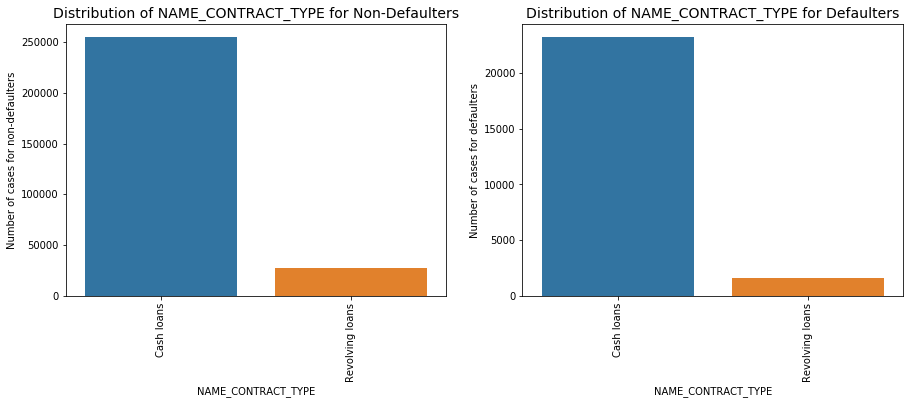

In [57]:
plot_univariate('NAME_CONTRACT_TYPE')

Inference: As we can observe from the above plot, there isn't any significant difference. Proportion of clients with cash loans are same for both defaulters and non-defaulters. Revolving loan is slightly higher in case of Non-Defaulters which can be due to the flexibility of repaying reborrowing nature of it. Therefore, it can be infered that with revolving loans there is slightly less chance of default. But as the difference of count of revolving loan cases is not very high this observation may be a less important one.

<Figure size 720x432 with 0 Axes>

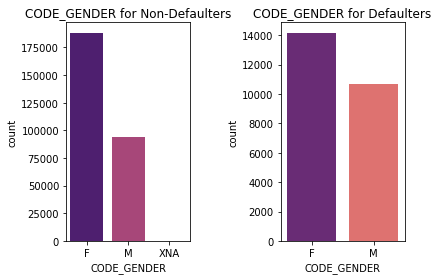

In [58]:
#Plotting on the basis of Gender
plt.figure(figsize=[10,6])
fig, (ax1, ax2) = plt.subplots(1,2)
count1 = sns.countplot('CODE_GENDER', data= non_default, order=non_default['CODE_GENDER'].value_counts().index, ax=ax1, palette='magma')
count1.axes.set_title('CODE_GENDER for Non-Defaulters', fontsize=12)
count2 = sns.countplot('CODE_GENDER', data= default, order=default['CODE_GENDER'].value_counts().index, ax=ax2, palette='magma')
count2.axes.set_title('CODE_GENDER for Defaulters', fontsize=12)
plt.tight_layout()
plt.show()

In [59]:
# As we can see there is a 'XNA' value in the non-defaulty dataset. We need to inspect that.
non_default.CODE_GENDER.value_counts()

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

The 'CODE_GENDER' column which is a categorical variable indicating gender of the customer, M for male and F for female, contains XNA value which indicates 'not available'. We need to impute this value. Here the mode is F and XNA is only 4 in count, therefore replacing the XNA values with F will not alter distribution of values in the variable.

In [60]:
Defaulter=default.CODE_GENDER.value_counts(normalize=True)
NonDefaulter=non_default.CODE_GENDER.value_counts(normalize=True)
print(Defaulter, NonDefaulter)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64 F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64


##### Inference: 
As we can observe from the above graph and the percentage distribution of both the groups proportion of female is higher in non-defaulter group and proportion of male is higher in defaulter group. Therefore, it can be infered that, female clients have low default rate and male clients are more likely to default.

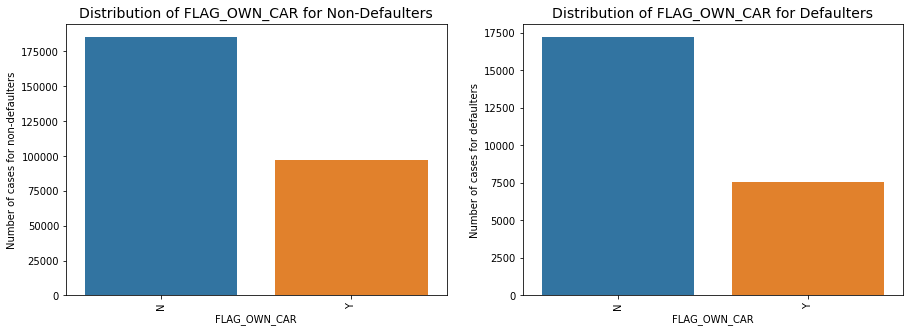

In [61]:
plot_univariate('FLAG_OWN_CAR')

The variable 'FLAG_OWN_CAR' has two values 'Y' and 'N' which stand for Yes and No respectively, indicating whether a client owns a car or not.
##### Inference:
As we can observe from the above graph proportion of the flags follows almost the same pattern in both the groups of clients. Therefore, we cannot infer much on the basis of whether or not a client owns a car.

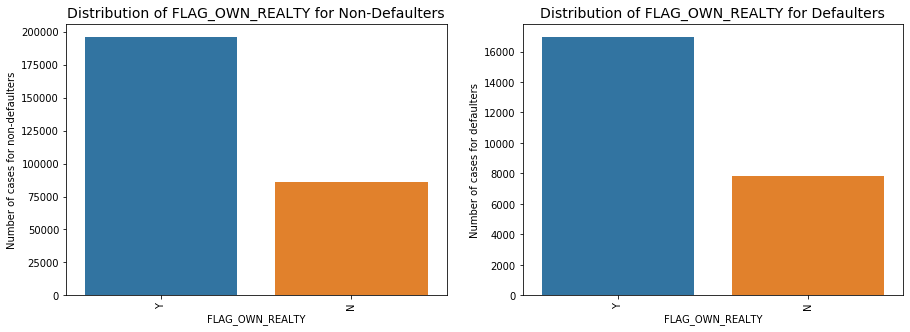

In [62]:
plot_univariate('FLAG_OWN_REALTY')

The variable 'FLAG_OWN_REALTY' has two values 'Y' and 'N' which stand for Yes and No respectively, indicating whether a client owns any real house/flat or not.
##### Inference:
As we can observe from the above graph proportion of the flags follows almost the same pattern in both the groups of clients. Therefore, we cannot infer much on the basis of whether or not a client owns a house or flat.

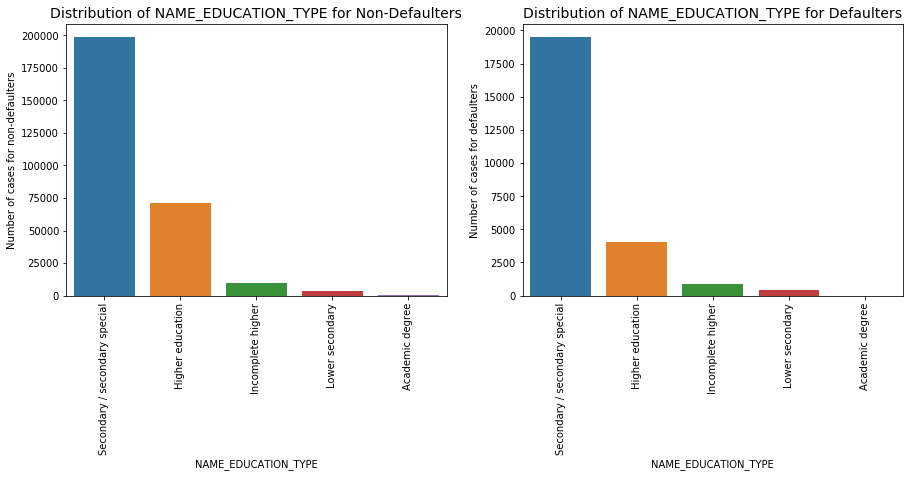

In [63]:
plot_univariate('NAME_EDUCATION_TYPE')

##### Inference:
Proportion of higher education is lesser in defaulter group compared to non-defaulter group. Therefore, it can be infered that clients with higher level of education has lower default rate. The reason can be, higher educational degree provides better paying jobs and it is easier to repay loan.

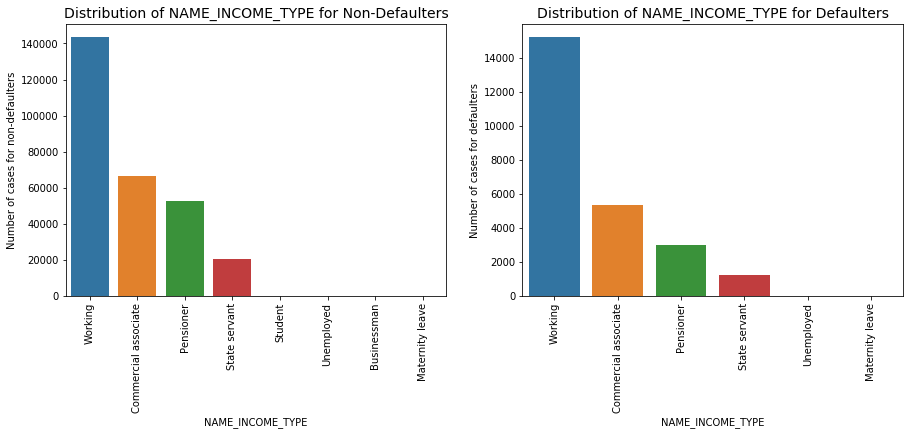

In [64]:
plot_univariate('NAME_INCOME_TYPE')

##### Inference:
The categories 'Commercial associate' and 'Pensioner' are proportionally higher in the non-defaulter group comoared to defaulter group. Therefore, we can say that client who are pension earners and work as commercial associates have lower default rates.

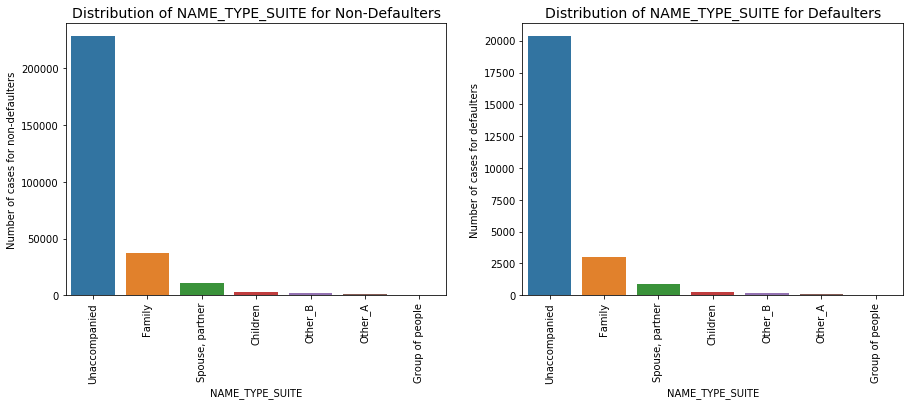

In [65]:
plot_univariate('NAME_TYPE_SUITE')

##### Inference:
Both group of clients have similar proportion of each category, hence, it can be infered that the client was accompanied by who does not affect the loan repayment by the client.

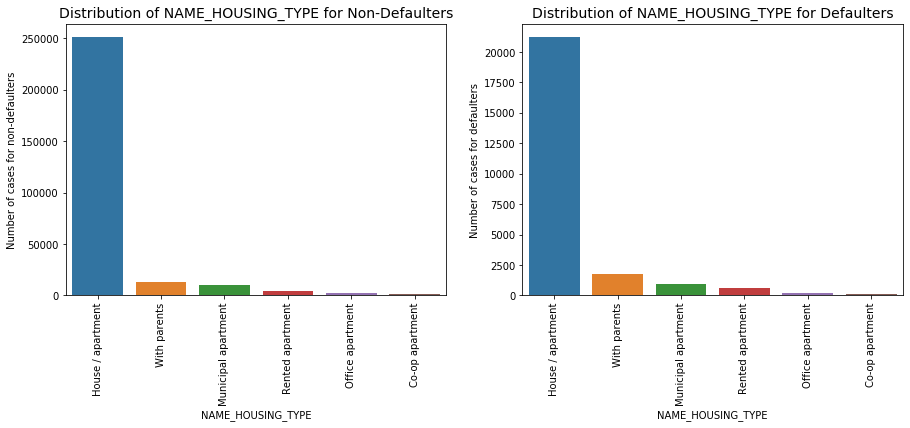

In [66]:
plot_univariate('NAME_HOUSING_TYPE')

##### Inference:
As it can be observed from the above plot the proportion of categories 'With parents' and 'Rented apartment' are higher in the defaulters compared to non-defaulters. Therefore it can be infered that people who live with their parents or live in a rented apartment tend to default more. People who live in rented apartments have an additional financial obligation of paying rent so less money left for repayment of loan. People who live with their parents have higher default rates as they do not earn well and hence cannot afford to repay loans or separate housing.

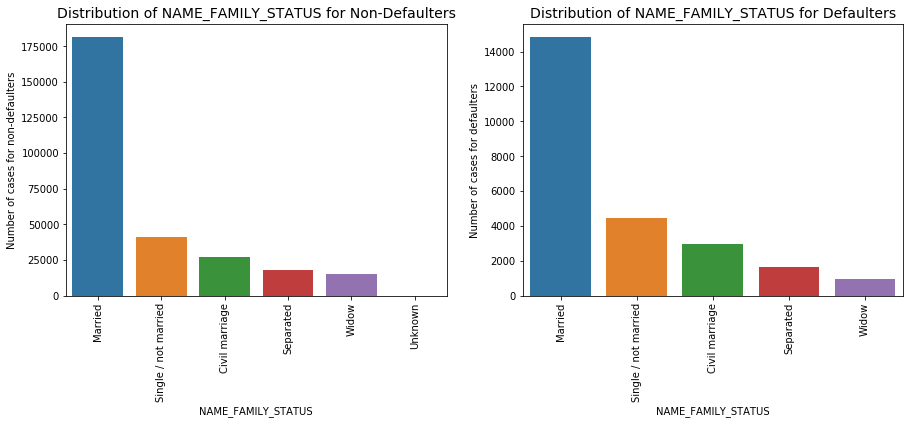

In [67]:
plot_univariate('NAME_FAMILY_STATUS')

##### Inference:
From the above plot we can see that, the 'Single/not married' category is proportiinally higher in defaulter group comapred to non-defaulters. Therefore, it can be infered that Single applicants have higher defaults. Again 'Widow' category is proportionally higher in non-defaulter group compared to defaulter group. 

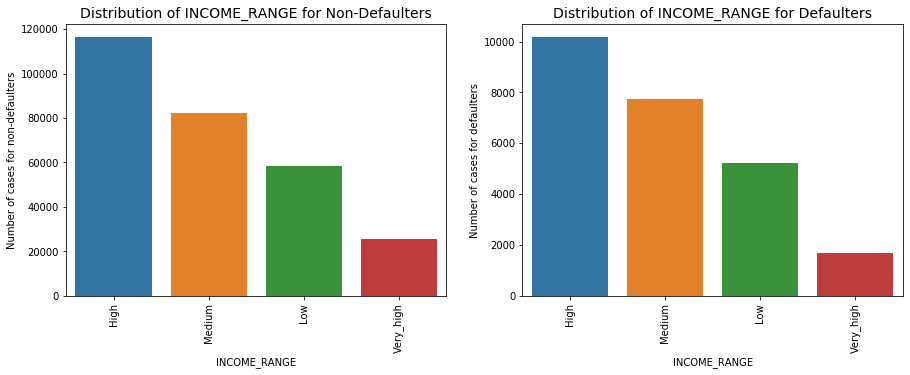

In [68]:
plot_univariate('INCOME_RANGE')

##### Inference:
From the  above plot we can observe that, although the proportions of different income range are mostly similar, proportion of medium income range is slightly higher in defaulter group than non-defaulter. Again, proportion of very high income group is higher in non-defaulter group, which seems natural. Therefore, from this plot we infer that, clients with income in medium range has a slightly higher default rate and people from very high income range has lower default rate.

### Numerical Variables

In this sub section we are going to plot the numerical variables one by one for both type of client and compare them

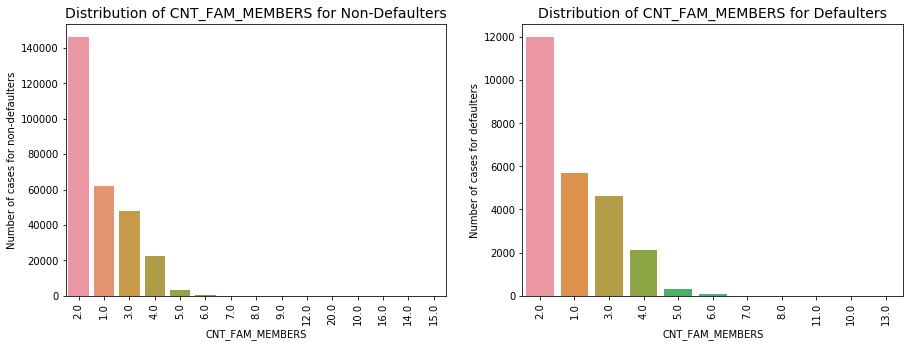

In [69]:
plot_univariate('CNT_FAM_MEMBERS')

In [70]:
Defaulter=default.CNT_FAM_MEMBERS.value_counts(normalize=True)
NonDefaulter=non_default.CNT_FAM_MEMBERS.value_counts(normalize=True)
print(Defaulter, NonDefaulter)

2.0     0.483746
1.0     0.228600
3.0     0.185619
4.0     0.086042
5.0     0.013172
6.0     0.002216
7.0     0.000242
8.0     0.000242
11.0    0.000040
10.0    0.000040
13.0    0.000040
Name: CNT_FAM_MEMBERS, dtype: float64 2.0     0.517709
1.0     0.219935
3.0     0.169776
4.0     0.079810
5.0     0.011147
6.0     0.001249
7.0     0.000265
8.0     0.000050
9.0     0.000021
12.0    0.000007
20.0    0.000007
10.0    0.000007
16.0    0.000007
14.0    0.000007
15.0    0.000004
Name: CNT_FAM_MEMBERS, dtype: float64


##### Inference:
From the percentage distribution of the column we can say that the percentage of clients more than two (i.e. 3,4,5,6) family members are higher in case of defaulter group compared to non-defaulter group. Therefore we can say client with more than two family members have higher rate of default.

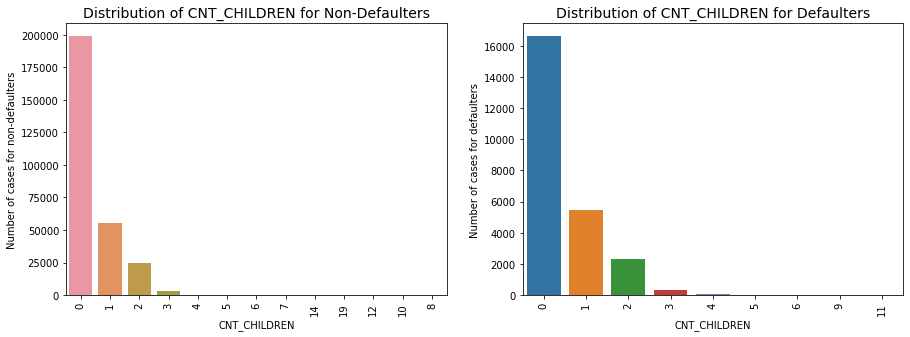

In [71]:
plot_univariate('CNT_CHILDREN')

In [108]:
Defaulter=default.CNT_CHILDREN.value_counts(normalize=True)
NonDefaulter=non_default.CNT_CHILDREN.value_counts(normalize=True)
print(Defaulter, NonDefaulter)

0     0.669043
1     0.219698
2     0.093978
3     0.014421
4     0.002216
5     0.000282
6     0.000242
9     0.000081
11    0.000040
Name: CNT_CHILDREN, dtype: float64 0     0.703119
1     0.196915
2     0.086371
3     0.011882
4     0.001323
5     0.000272
6     0.000053
7     0.000025
14    0.000011
19    0.000007
12    0.000007
10    0.000007
8     0.000007
Name: CNT_CHILDREN, dtype: float64


##### Inference:
The Defaulter group has higher percentage people having more than one child. Therefore, it is safe to infer that higher number of children increases the likelihood of defaulting on loan repayment.

### Correlation among the numeric variables for both Default and Non-Default group

In [72]:
Non_default_corr= non_default.iloc[0:,2:]
Default_corr= default.iloc[0:,2:]

Non_default_matrix=Non_default_corr.corr(method='spearman')
Default_matrix=Default_corr.corr(method='spearman')

In [73]:
# Correlation matrix for Non-default group
Non_default_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_POPULATION_RELATIVE,AGE
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.205693,0.810519,-0.025551,-0.375611
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485699,0.419929,-0.095898,0.044988,0.097772,-0.093418
AMT_CREDIT,0.002315,0.416017,1.000000,0.831900,0.985510,0.017986,0.079496,0.053570,0.057140
AMT_ANNUITY,0.024767,0.485699,0.831900,1.000000,0.830368,-0.030195,0.096422,0.058591,-0.011725
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830368,1.000000,0.022659,0.079388,0.062650,0.058242
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,0.022659,1.000000,-0.152194,-0.003651,0.583506
CNT_FAM_MEMBERS,0.810519,0.044988,0.079496,0.096422,0.079388,-0.152194,1.000000,-0.017711,-0.282407
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062650,-0.003651,-0.017711,1.000000,0.030825
AGE,-0.375611,-0.093418,0.057140,-0.011725,0.058242,0.583506,-0.282407,0.030825,1.000000


In [74]:
# Correlation matrix for Default group
Default_matrix

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_POPULATION_RELATIVE,AGE
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.127943,0.823307,-0.031628,-0.267796
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,-0.036127,0.003867,0.051463,0.007080
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.082434,0.067447,0.039919,0.154908
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,-0.003396,0.088604,0.023297,0.030173
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.092648,0.064627,0.054140,0.157548
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.092648,1.000000,-0.072859,0.020003,0.466179
CNT_FAM_MEMBERS,0.823307,0.003867,0.067447,0.088604,0.064627,-0.072859,1.000000,-0.022721,-0.172180
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054140,0.020003,-0.022721,1.000000,0.046166
AGE,-0.267796,0.007080,0.154908,0.030173,0.157548,0.466179,-0.172180,0.046166,1.000000


In [75]:
# Plotting heatmap for both the correlation matrix as heatmaps are the best way to visualize correlation
def heatmap_corr(data,title):
    plt.figure(figsize=(10, 10))
    
    sns.heatmap(data, cmap='YlGnBu', annot=True)
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

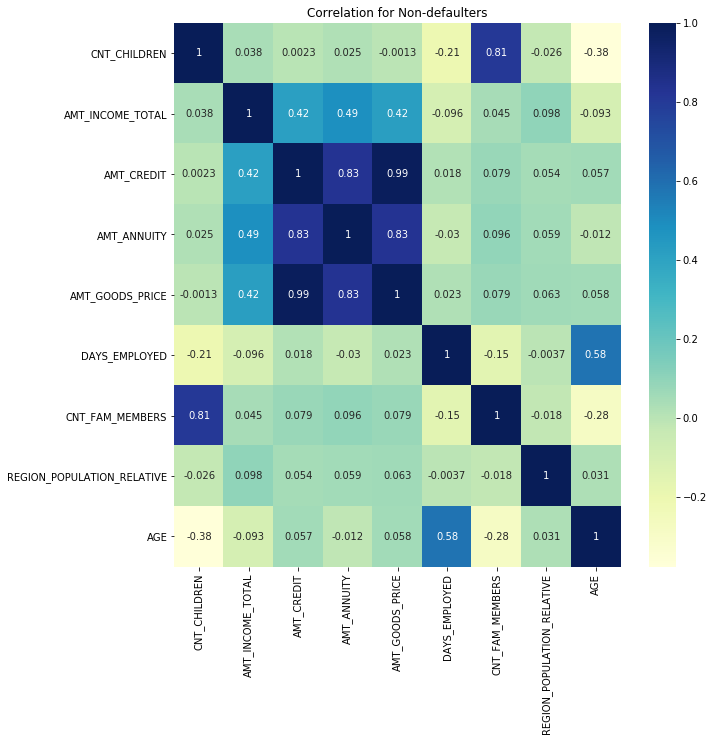

In [76]:
# heatmap for Non-Default group
heatmap_corr(data=Non_default_matrix, title= 'Correlation for Non-defaulters')

##### Inference:
1. Credit amount is positively correlated with Age of the client, which is logical because as age increases financial liability of people increases hence they apply for higher amount of credit.
2. Age and number of days the client has been employed to the his/her current job are strongly positively correlated. As age increases people become more settled in their career.
3. A person's income and credit amount, both are positively correlated with how densely populated the area the person leaves in. In other words, the more densely populated the area is the higher the client's income and credit amount of the loan. This also seems logical as the more densely populated a area is the more commerce and opportunities are there, hence the higher income. Also the living expense in more populated area (for example cities) is higher or businesses are more capital intensive and that might be the reason why loan credit amount is also higher.
4. People living in densely populated area has less number of children and less number of family members, as implied by the negative correlations. The logical explanation might be, as densly populated area also has higher income, living expense in those area is higher. People tend to have less children and less number of family members to lessen financial stress.
5. Another interesting observation is, a client's age and number of days the client has been employed to the his/her current job are showing a negative correlation with the income. This requires further investigation as it is contrary to logic.
6. Amount of income, credit amount, loan annuity and price of the good for which loan is applied are all highly positively correlted to each other.

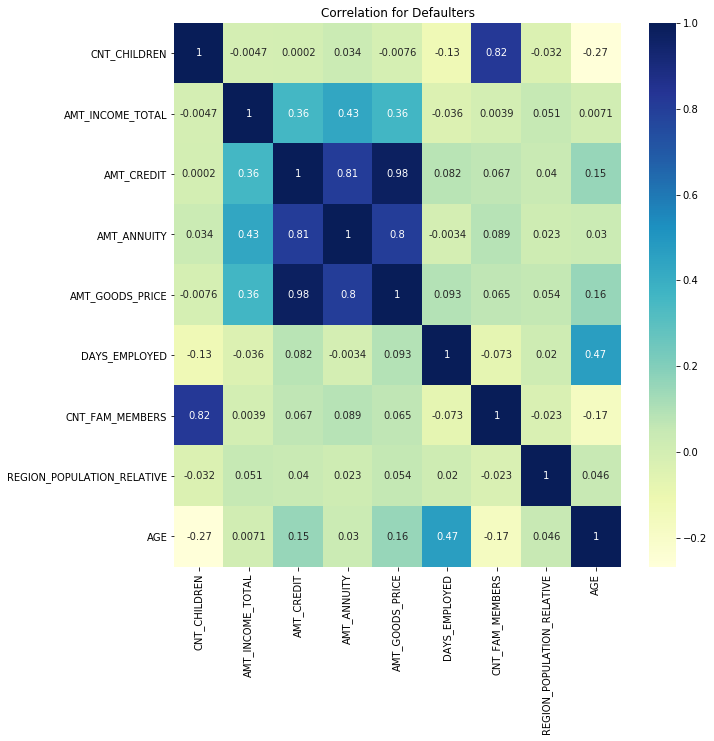

In [77]:
# heatmap for Default group
heatmap_corr(data=Default_matrix, title= 'Correlation for Defaulters')

##### Inference:
1. Similar to the Non-defaulter group, here also Credit amount is positively correlated with Age of the client. The logical explanation behind the statistical correlation also remains the same, which is as age increases financial liability of people increases hence they apply for higher amount of credit.
2. Age and number of days the client has been employed to the his/her current job are positively correlated. But the strength of correlation is lesser compared to non-defaulter group.
3. There relation between a person's income, credit amount and how densely populated the area the person leaves in is similar to that of the Non-defaulter group. But the strength of the positive correlations are slightly weaker in this case.
4. The relations between number of family members and children and population density of living region are similar.
5. The relations between a client's age, number of days the client has been employed to his/her current job and client's income are negative similar to the non-defaulter group. This also requires further investigation.
6. Amount of income, credit amount, loan annuity and price of the good for which loan is applied are all highly positively correlted to each other. Similar to the Non-defaulter group.

## Bivariate and Multivariate Analysis

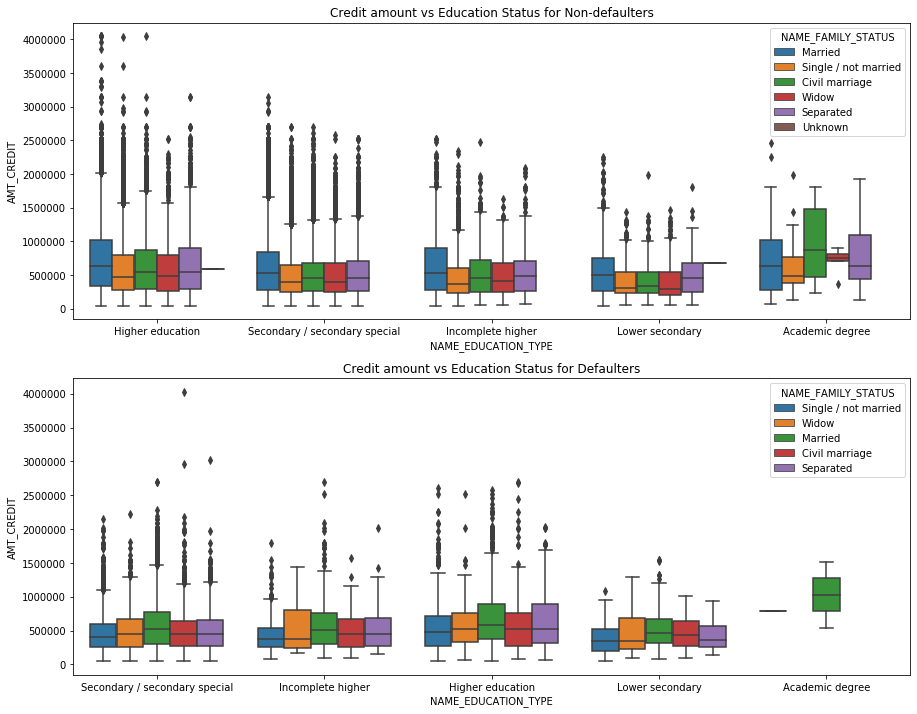

In [78]:
plt.figure(figsize=(15,12))
plt.subplot(2, 1, 1)
plt.title('Credit amount vs Education Status for Non-defaulters')
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')

plt.subplot(2, 1, 2)
plt.title('Credit amount vs Education Status for Defaulters')
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS')

plt.show()

##### Inference:
Non-default:
1. 'Higher education' group has most outliers and 'Academic degree' has least outliers.
2. 'Single/Not Married' of all education categories has least median credit amount.
3. 'Civil Marraige' of Academic degree has significantly higher median credit amount compared to all other education categories.
4. 'Lower Secondary' education category has the lowest median credit amount across all the categories of education type.

Default:
1. 'Higher education' and 'Secondary/ secondary special' have most outliers and 'Lower secondary' and 'Academic degree' have least outliers.
2. In 'Academic degree' education category only married people have defaulted.
3. 'Married' people have the highest median credit amount accross all education categories.

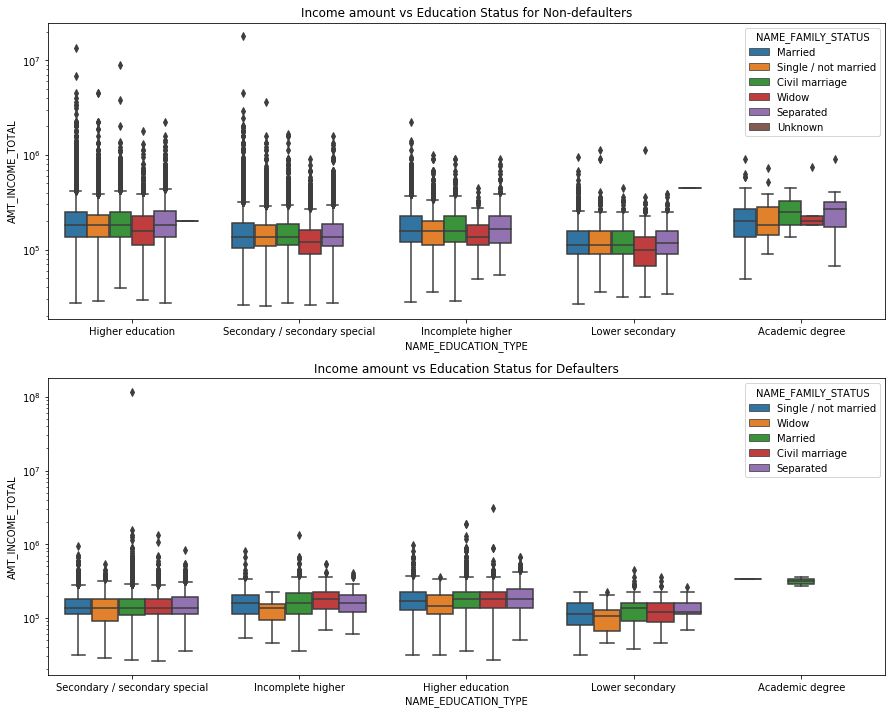

In [79]:
# Plotting Income amount in logarithmic scale

plt.figure(figsize=(15,12))
plt.subplot(2, 1, 1)
plt.yscale('log')
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS' )
plt.title('Income amount vs Education Status for Non-defaulters')
plt.subplot(2, 1, 2)
plt.yscale('log')
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS')
plt.title('Income amount vs Education Status for Defaulters')

plt.show()

##### Inference:
Non-default:
1. 'Heigher education' and 'Secondary/secondary special' have the most number of outliers.'Lower secondary' and 'Academic degree' category has the least number of outliers
2. Clients who are 'Widow' has the lowest median income in each educationa category
3. Except for 'Academic degree' category all other education category exhibit similar sort of distribution of income across all type of family status.
4. Median income is the lowest for 'Lower secondary' education category for all types of family status.

Default:
1. Quite similar to the Non-default group, 'Heigher education' and 'Secondary/secondary special' have the most number of outliers and 'Academic degree' category has the least number of outliers
2. Median income of of 'Secondary/secondary special' is almost same for all type of family status. But, the category 'Widow' is negatively skewed while all others are positively skewed. Which implies, majority of people belonging to 'Widow' category who are defaulters, earn less than the median income.
3. Clients who are 'Widow' has the lowest median income in each educationa category except 'Secondary/secondary special' education category. But in all other education category 'Widow' exhibits uniform or positively skewed distribution but in 'Secondary/secondary special' category the distribution is negatively skewed.
4. Similar to Non-default group, Median income is the lowest for 'Lower secondary' education category for all types of family status.
5. Only 'Married' people have defaulted in 'Academic Degree' category.

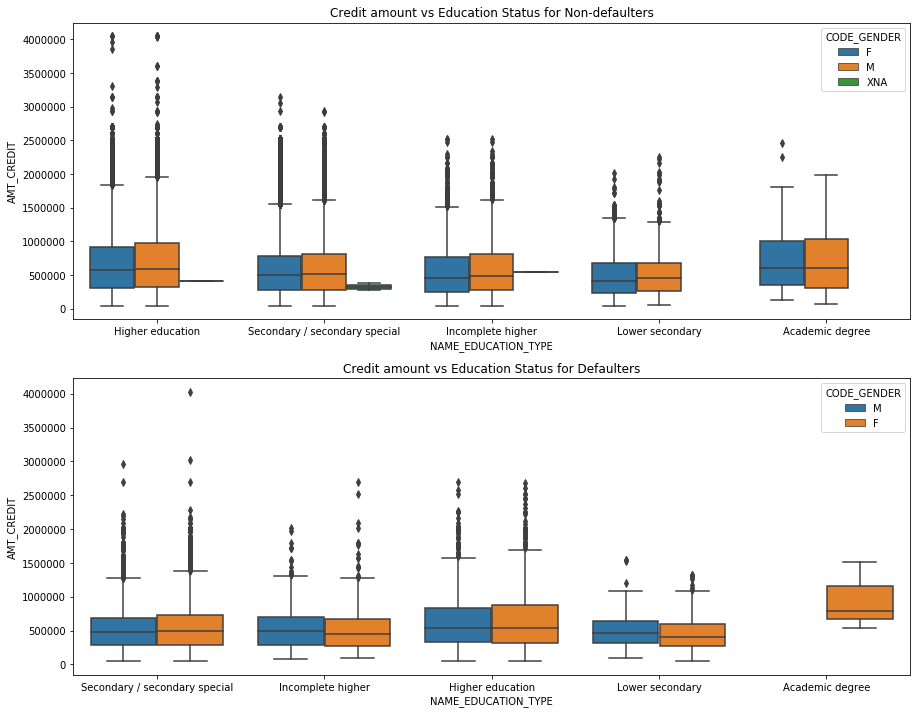

In [80]:
plt.figure(figsize=(15,12))
plt.subplot(2, 1, 1)
plt.title('Credit amount vs Education Status for Non-defaulters')
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER')

plt.subplot(2, 1, 2)
plt.title('Credit amount vs Education Status for Defaulters')
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='CODE_GENDER')

plt.show()

##### Inference:
Non-Default:
1. 'Higher education' category has the highest median credit amount across all gender.
2. 'Higher education' category exhibits the highest number of outliers. 'Lower secondary' and 'Academic degree' exhibit the lowest number of outliers.
3. Median credit amount is higher or equal for male clients compared to females.
4. Almost all categories exhibit positively skewed distribution for both genders.

Default:
1. Observations quite similar to Non-default group. Except all category exhibits positively skewed or uniform distribution of values.
2. In 'Academic degree' category only females have defaulted.

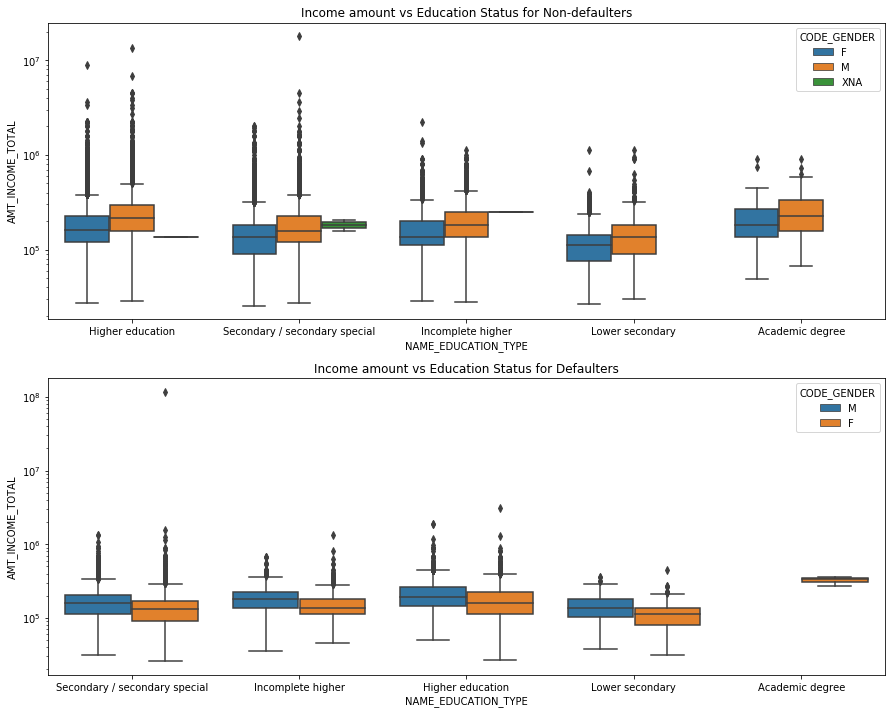

In [81]:
plt.figure(figsize=(15,12))
plt.subplot(2, 1, 1)
plt.yscale('log')
sns.boxplot(data =non_default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER')
plt.title('Income amount vs Education Status for Non-defaulters')
plt.subplot(2, 1, 2)
plt.yscale('log')
sns.boxplot(data =default, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='CODE_GENDER')
plt.title('Income amount vs Education Status for Defaulters')

plt.show()

##### Inference:
Non-default:
1. Male clients typically have higher median income across all educational category.
2. 'Higher education' category has the highest median income in both the genders.
3. 'Higher education' and 'Secondary/secondary special' categories exhibit most outliers and 'Academic degree' exhibits the least outliers.

Default:
1. Mostly similar observations as Non-default group.
2. In 'Academic degree' category only female clients has defaulted.

## Loading the second dataset

In [82]:
df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df_prev.shape

(1670214, 37)

In [84]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [85]:
#Checking for null values in percentage
(df_prev.isnull().sum()/ len(df_prev))*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [86]:
# Dropping the columns with more than 50% missing values
cols_prev = df_prev.columns[df_prev.isnull().mean()>0.5]
df_prev.drop(cols_prev, axis=1, inplace=True)

In [87]:
df_prev.shape

(1670214, 33)

In [88]:
# Checking for percentage of missing values again to determine what to do next
(df_prev.isnull().sum() * 100 / len(df_prev)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [89]:
# As the null values in PRODUCT_COMBINATION is very less we can impute it.
df_prev.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

As we see, this is a object variable. Therefore, we can impute the missing values using mode of the variable, i.e., Cash

## Visualization

Now lets visualize some other variable
The variable 'NAME_CONTRACT_STATUS' is of special interest as it represents the status (approved, rejected etc.) of previous application.

In [90]:
#Calculating the percentage of different status 
df_status = round((df_prev['NAME_CONTRACT_STATUS'].value_counts()/df_prev["NAME_CONTRACT_STATUS"].count())*100,2)
df_status = pd.DataFrame(df_status)
df_status.reset_index(level=0, inplace=True)
df_status.rename(columns=  {"index": "NAME_CONTRACT_STATUS", 
                     "NAME_CONTRACT_STATUS":"Percentage"}, 
                                 inplace = True) 
df_status.sort_values(by = 'Percentage' , inplace = True, ascending = False)
df_status

,NAME_CONTRACT_STATUS,Percentage
0,Approved,62.07
1,Canceled,18.94
2,Refused,17.40
3,Unused offer,1.58


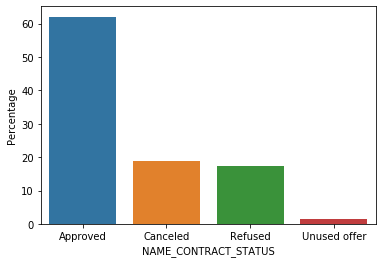

In [91]:
# plotting the percentages
sns.barplot(x='NAME_CONTRACT_STATUS', y='Percentage', data=df_status);

In [92]:
#Now merging the two dataframes to plot the previous contract status of clients against current variables
df_merge = pd.merge(df_prev,df_app,how="inner",on="SK_ID_CURR")
df_merge

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_x,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE_y,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,INCOME_RANGE,AGE,AGE_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,7392,NaN,3.0,Military,0.046220,High,39,"(35.0, 40.0]"
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,1800000.0,SATURDAY,18,Y,1,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,7392,NaN,3.0,Military,0.046220,High,39,"(35.0, 40.0]"
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,108400.5,SUNDAY,14,Y,1,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,7392,NaN,3.0,Military,0.046220,High,39,"(35.0, 40.0]"
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1255,Private service staff,2.0,Self-employed,0.025164,Low,58,"(55.0, 60.0]"
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,450000.0,WEDNESDAY,9,Y,1,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1255,Private service staff,2.0,Self-employed,0.025164,Low,58,"(55.0, 60.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1261221,277978,Consumer loans,6030.675,133866.0,133866.0,133866.0,SATURDAY,15,Y,1,XAP,Approved,-832,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Regional / Local,200,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-801.0,-111.0,-531.0,-518.0,0.0,0,Cash loans,F,N,N,0,117000.0,508495.5,22527.0,454500.0,Unaccompanied,State servant,Secondary / secondary special,Widow,House / apartment,1921,Sales staff,1.0,Trade: type 7,0.008866,Medium,62,"(60.0, 65.0]"
1413697,1563733,227766,Consumer loans

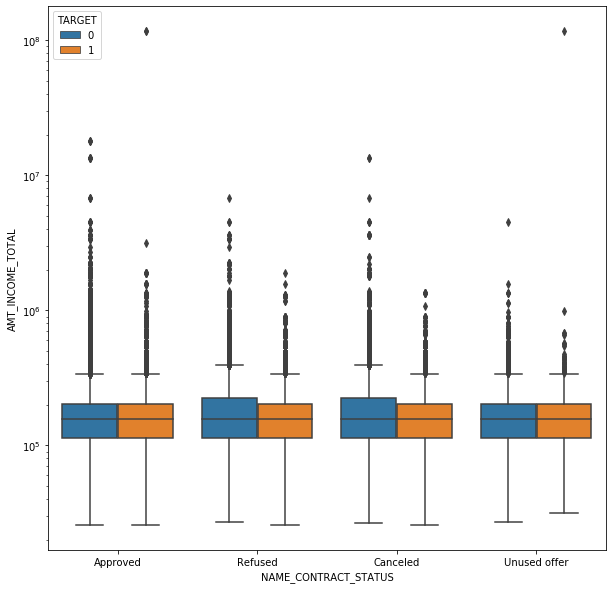

In [101]:
# Plotting 'NAME_CONTRACT_STATUS' against 'AMT_INCOME'
plt.figure(figsize=(10,10))
plt.yscale('log')
ax = sns.boxplot(data =df_merge, x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL', hue ='TARGET')

plt.show()

Inference: There is not much difference in any of the category. Hence nothing useful can be inferred.

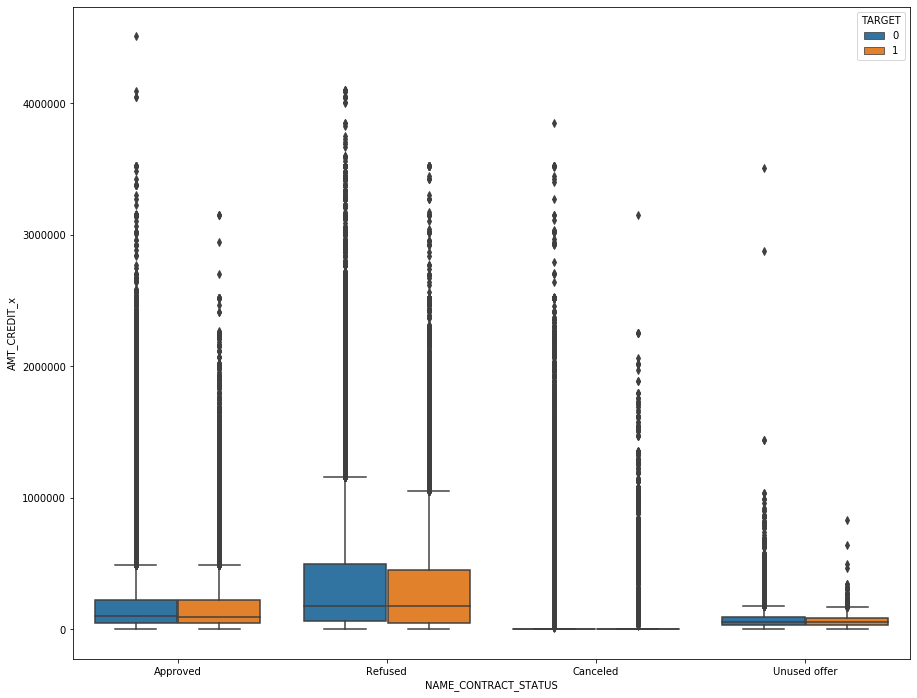

In [107]:
# Plotting 'NAME_CONTRACT_STATUS' against 'AMT_CREDIT_x'
plt.figure(figsize=(15,12))

ax = sns.boxplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT_x', hue ='TARGET', data=df_merge)

plt.show()

Inference:
Each category has huge outliers. There is no difference in median credit amount for defaulters and non-defaulters. Median credit amount is highest for refused status. 

## Conclusion

The bank or credit company should pay extra caution while lending out to the 
1. Female clients with Academic degree.
2. The people who live in rented apartment or with parents.
3. People having more than two family member and more than a single child.
4. Default rate of male clients are higher than females.